In [1]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [222]:
full_data = pd.read_csv('../data/full_data.csv',low_memory=False)
full_data.head()

,OrderId,UserId,RestaurantId,Date,Rating,Comments,Address,Count,ItemId,Price,ViewCount,Name,Description,SearchVector,Type
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main
3,294,3,121,2020-05-13 17:34:35.519326,NaN,NaN,NaN,1,455,1.5,9.0,Regular Coffee,NaN,'coffe':2 'regular':1,Drink
4,297,142,121,2020-05-14 00:08:48.756423,NaN,NaN,NaN,1,540,9.9,485.0,Kashk Bademjan,"Barbequed eggplant, lentils, fried onions, gar...",'bademjan':2 'bbq':8 'egg':10 'eggplant':6 'ga...,Main


In [223]:
items = pd.read_csv('../data/itemsInfo.csv',low_memory=False)
items.head()

,Id,Name,Description,PhotoUrl,TagsString,Rating,RatingCount,Calories,Fiber,Carbohydrate,SearchVector,IsGlobal,Property,Sku,Type
0,81465,Popina Bottled Water,NaN,https://res.cloudinary.com/fooreco/image/uploa...,NaN,NaN,0,NaN,NaN,NaN,'bottl':2 'popina':1 'water':3,False,NaN,NaN,Drink
1,81456,"Mayhem, Pinot Gris (bottle)",750 ML,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bottl':4 'gris':3 'mayhem':1 'pin...,False,NaN,NaN,Liquor
2,81457,"Bartier Bros, Merlot (bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bartier':1 'bottl':4 'bros':2 'me...,False,NaN,NaN,Liquor
3,81458,"Joie Brut, sparkling wine (1/2 Bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'1/2':5 'alcohol':7 'bottl':6 'brut':2 'joie':...,False,NaN,NaN,Liquor
4,81460,"Powell Street, Ode to Citra (473 Ml)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'473':6 'alcohol':8 'citra':5 'ml':7 'ode':3 '...,False,NaN,NaN,Liquor


In [224]:
items.columns = [c.lower() for c in items.columns]

In [225]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83352 entries, 0 to 83351
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            83352 non-null  int64  
 1   name          83352 non-null  object 
 2   description   62665 non-null  object 
 3   photourl      1414 non-null   object 
 4   tagsstring    39205 non-null  object 
 5   rating        46 non-null     float64
 6   ratingcount   83352 non-null  int64  
 7   calories      56 non-null     float64
 8   fiber         55 non-null     float64
 9   carbohydrate  41 non-null     float64
 10  searchvector  83351 non-null  object 
 11  isglobal      83352 non-null  bool   
 12  property      25 non-null     object 
 13  sku           25 non-null     float64
 14  type          83352 non-null  object 
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 9.0+ MB


In [226]:
items.description.isna().sum()

20687

In [227]:
items = items[~items.description.isna()].reset_index(drop=True)

In [228]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62665 entries, 0 to 62664
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            62665 non-null  int64  
 1   name          62665 non-null  object 
 2   description   62665 non-null  object 
 3   photourl      892 non-null    object 
 4   tagsstring    33191 non-null  object 
 5   rating        38 non-null     float64
 6   ratingcount   62665 non-null  int64  
 7   calories      22 non-null     float64
 8   fiber         21 non-null     float64
 9   carbohydrate  18 non-null     float64
 10  searchvector  62665 non-null  object 
 11  isglobal      62665 non-null  bool   
 12  property      25 non-null     object 
 13  sku           25 non-null     float64
 14  type          62665 non-null  object 
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 6.8+ MB


In [229]:
items.description.isna().sum()

0

In [230]:
foods = pd.read_csv('../data/items.csv')
foods[foods['Id'] == 440]
items[items['id'] == 382]

,id,name,description,photourl,tagsstring,rating,ratingcount,calories,fiber,carbohydrate,searchvector,isglobal,property,sku,type
15513,382,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,https://res.cloudinary.com/fooreco/image/uploa...,Olive Oil Saffron Lemon Juice Yogurt Chicken ...,5.0,2,NaN,NaN,NaN,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,False,NaN,NaN,Main


In [231]:
items.description

0                                                  750 ML 
1        8 oz grass-fed BC beef caramelized on flat top...
2        8oz boneless chicken leg marinated in buttermi...
3        4 oz grass-fed BC beef caramelized on flat top...
4                         Yogurt drink with special herbs.
                               ...                        
62660    Crunchy juicy pork, half-boiled egg, green oni...
62661    Momo (teriyaki), umeshiso yaki, jumbo mé maki,...
62662    Teriyaki chicken, half-boiled egg, mayo, green...
62663                          Salmon roe on steamed rice.
62664    Pan-fried udon, a half-boiled egg w/ spicy cod...
Name: description, Length: 62665, dtype: object

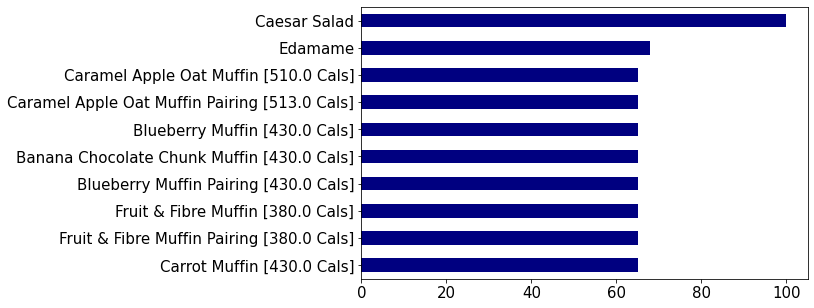

In [232]:
items['name'].value_counts()[0:10].plot(kind ='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()


In [233]:
items = items[~(items.description.duplicated() & items.name)].reset_index()

In [234]:
(items.description.duplicated() & items.name).sum()

0

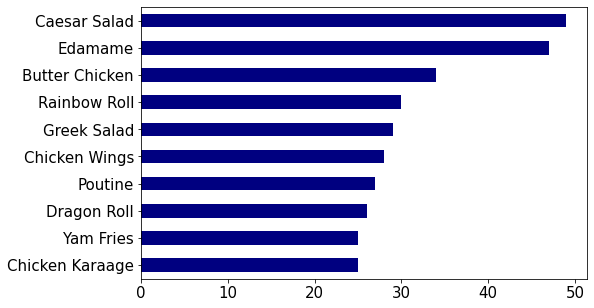

In [235]:
items['name'].value_counts()[0:10].plot(kind ='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()


In [236]:
def tokenize(text):
    r = Rake()
    r.extract_keywords_from_text(text.lower().replace('-',''))
    return r.get_ranked_phrases()[0:10]


In [237]:
items['tokenized'] = items.description.apply(tokenize)

In [238]:
items['tokenized'].iloc[10]

['seamless structure shows rich',
 'berry flavours peppered',
 '– vibrant',
 'wine leaps',
 'great wine',
 'cabernet sauvignon',
 'rich',
 'velvety',
 'vanilla',
 'touch']

In [239]:
items['tokens'] = items.tokenized.apply(lambda x: ','.join(map(str,x)))

In [240]:
counter = CountVectorizer()
count_matrix = counter.fit_transform(items.tokens)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.40327957 ... 0.07216878 0.06154575 0.06154575]
 [0.         0.40327957 1.         ... 0.         0.         0.05415304]
 ...
 [0.         0.07216878 0.         ... 1.         0.         0.10660036]
 [0.         0.06154575 0.         ... 0.         1.         0.        ]
 [0.         0.06154575 0.05415304 ... 0.10660036 0.         1.        ]]


In [241]:
indices = pd.Series(items['name'])
indices 


0                   Mayhem, Pinot Gris (bottle)
1        Grass Fed BC Double Cheeseburger (8oz)
2              Crispy Free Run Chicken Sandwich
3           Grass Fed Bc Beef Cheesburger (4oz)
4                               Doogh (pitcher)
                          ...                  
28429                               Gin & Tonic
28430                                Gin & Soda
28431                   Pacific North West Roll
28432             2. Zakkushi Set ( 5 skewers )
28433                 63. Mentai carbonara Udon
Name: name, Length: 28434, dtype: object

In [242]:
def recommend(name, cosine_sim = cosine_sim):
    recommended_items = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_items.append(items['name'][i])
        
    return recommended_items

In [275]:
sample_item = items.iloc[100]
sample_name = sample_item['name']
sample_desc = sample_item['description']
print('The item name is {}\nThe description is: {} '.format(sample_name,sample_desc))

The item name is Raizo Sundae Parfait
The description is: Green tea and vanilla ice cream with mochi ball, red bean, roasted soybean powder, black sweet sauce, corn flakes and whipped cream. 


In [276]:
recommend(sample_name)

['Kuromitsu Kinako Ice Cream',
 'Raizo Strawberry parfait ',
 'Matcha Red Bean Waffle',
 'White Chocolate Brownie',
 'Matcha Red Bean Creamy Frappe',
 'Matcha World Ice Cream',
 'Mango Ice Cream',
 'Chicken Cannelloni',
 'Mocha Frappe',
 'White Chocolate Brownie']